## Classificador MLP

O Classificador Perceptron Multicamadas (MLP) é baseado no Perceptron Simples, porém com camadas de neurônios antes da camada de saída [1]. Esse algoritmo é treinado com base no fluxo de informações à frente (*feedforward*), atualizando os pesos das camadas posteriores, e na retropropagação do erro (*backpropagation*) onde os neurônios das camadas anteriores têm os pesos atualizados com base no erro [2].

Para o algoritmo em questão, os pesos da camada de entrada e da camada de saída foram iniciados de forma aleatória com distribuição normal, assim como os viéses (*biases*). A cada época, os pesos são atualizados com base na taxa de aprendizado, no gradiente do erro e na saída de cada neurônio após ativação (função sigmóide na camada de entrada e função *softmax* na camada de saída). 

O erro quadrático médio de cada época (*loss*) é calculado e usado como função-custo, para diminuir a cada época. Um critério de parada foi estabelecido para quando o *loss* deixa de diminuir (i. e. não mais converge) por X épocas. O número de neurônios da camada oculta foi encontrado por meio do algoritmo de busca aleatória (*Random Search*).

Usou-se uma taxa de aprendizado de 0.01 (tanto para o MLP, como para o *Random Search*), treinamento com 5 mil épocas, critério de parada de 15 épocas seguidas e busca aleatória da quantidade de neurônios da camada oculta na faixa de 2 a 500. O *Random Search* também usa estratégia de *cross-validation* durante a busca aleatória e a estratégia utilizada foi de *Stratified KFold*, com 3 *folders*. Os demais métodos da busca aleatória foram os mesmos do MLP (ativações, taxa de aprendizado, etc).

### Sobre o dataset
A classificação foi feita para o *dataset* MNIST, de dígitos feitos à mão [3], que é composto por 60 mil imagens de treino e 10 mil imagens de teste. Todas elas são de dimensões 28x28 *pixels* e possuem suas respectivas classes (*labels*). O único pré-processamento utilizado foi a vetorização das imagens e a concatenação da matriz de imagens com um vetor de viés (*bias*), resultando em 785 atributos para a classificação. As *labels* também foram convertidas para o formato de vetor (*one hot*).

### Resultados
Dessa forma, após o treinamento, obtenção dos pesos e predição do conjunto de teste, obteve-se uma taxa de erro de **0.0684**, próximo ao resultado obtido por LeCun *et al.* [3], que obteve **0.047**.

**Referências:**
1.  D. E. Rumelhart, G. E. Hinton, and R. J. Williams. Learning representations by backpropagating errors. Nature, 323:533–536, 1986.
2.  A. Bhaya and E. Kaszkurewicz. Steepest descent with momentum for quadratic functions is a version of the conjugate gradient method. *Neural Networks*, 17(1):65–71, 2004.
3. Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." *Proceedings of the IEEE*, 86(11):2278-2324, November 1998..

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('../Datasets/Iris/Iris.csv')

dataset

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [27]:
# Separando o dataset por classe
X = np.array(dataset.iloc[:, 1:-1])
y = np.array(dataset.iloc[:, -1])

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [28]:
# Convertendo y para numérico
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)

print(y)
print(X.shape, y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4) (150,)


In [29]:
# Separando dados de treino/teste
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train_raw.shape, y_train_raw.shape)
print(X_test_raw.shape, y_test_raw.shape)

(120, 4) (120,)
(30, 4) (30,)


In [30]:
# Adicionar uma coluna de 1s para considerar o termo de bias (intercept) no modelo linear
X_train = np.column_stack((X_train_raw, np.ones(X_train_raw.shape[0])))
X_test = np.column_stack((X_test_raw, np.ones(X_test_raw.shape[0])))

# Colocar y em formato de vetor (one hot)
def one_hot_convert(vec):
    matrix = []
    for idx in vec:
      m = np.zeros((3, 1))
      m[idx] = 1
      matrix.append(m)
    return np.array(matrix)

y_train = one_hot_convert(y_train_raw).reshape(y_train_raw.shape[0], -1)
y_test = y_test_raw.reshape(y_test_raw.shape[0], -1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 5) (120, 3)
(30, 5) (30, 1)


In [31]:
# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)   
    elif type == 'tanh':
        return np.tanh(matrix)

# Função de treino do MLP
def mlp_train(X, y, n_neurons_hlayer, epochs, l_rate, criteria):
    n_classes = y.shape[1]
    n_features = X.shape[1]

    w_input = np.random.randn(n_features, n_neurons_hlayer) * 0.1
    w_output = np.random.randn(n_neurons_hlayer, n_classes) * 0.1

    bias_input = np.random.randn(n_neurons_hlayer, 1) * 0.5
    bias_output = np.random.randn(n_classes, 1) * 0.5

    loss_history = []
    for epoch in range(epochs):
        
        # Forward
        Zin = (X @ w_input) + bias_input.T
        result_in = activate_functions('sigmoid', Zin)

        Zout = (result_in @ w_output) + bias_output.T
        result_out = activate_functions('softmax', Zout)

        # Backpropagation
        error_out = result_out - y
        grad_out = error_out / len(X)

        error_in = grad_out @ w_output.T
        grad_in = error_in * result_in * (1 - result_in)

        # Ajustar os pesos e os viéses
        w_input -= l_rate * np.dot(X.T, grad_in)
        w_output -= l_rate * np.dot(result_in.T, grad_out)

        bias_input -= l_rate * np.sum(grad_in, axis=0, keepdims=True).T
        bias_output -= l_rate * np.sum(grad_out, axis=0, keepdims=True).T

        if epoch == 0:
            loss = np.mean((y - result_out)**2)
            print('Initial Epoch: {}, loss: {}'.format(epoch, loss))
            best_loss = loss
            loss_history.append(loss)
            
        if epoch != 0 and epoch % 5 == 0:
            loss = np.mean((y - result_out)**2)
            print('Epoch: {}, loss: {}'.format(epoch, loss))
            loss_history.append(loss)

            if loss < best_loss:
                best_loss = loss
                wait = 0
            else: wait += 1

            if wait >= criteria:
                print('Final Epoch (loss stopped): {}, loss: {}'.format(epoch, loss))
                return loss_history, w_input, w_output, bias_input, bias_output

    loss = np.mean((y - result_out)**2)
    print('Last Epoch: {}, loss: {}'.format(epoch+1, loss))
                                      
    return loss_history, w_input, w_output, bias_input, bias_output

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

def random_search(X, y):
    mlp = MLPClassifier(activation='logistic', learning_rate_init=0.01) # Mantendo configurações do MLP - l_rate, função de ativação sigmoid, etc

    params_search = {"hidden_layer_sizes": list(np.arange(2,500))}
    
    search = RandomizedSearchCV(mlp, param_distributions=params_search, n_jobs=-1, cv=3, verbose=5) # Busca do melhor numero de neuronios da camada
    search.fit(X, y)
    best = search.best_params_['hidden_layer_sizes']
    
    return best

n_neurons = random_search(X_train, y_train)
print("Neurons in hidden layer: ", n_neurons)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maxim

Neurons in hidden layer:  367


/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/matheus/Documentos/Mestrado/ICA-IFCE-20232/.env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maxim

In [33]:
loss_history, w_input, w_output, bias_input, bias_output = mlp_train(X_train, y_train, n_neurons, epochs=5000, l_rate=0.1, criteria=15)

Initial Epoch: 0, loss: 0.26129371183733635
Epoch: 5, loss: 0.25150848094918105
Epoch: 10, loss: 0.20754419214675524
Epoch: 15, loss: 0.18125433877222205
Epoch: 20, loss: 0.18599612149029082
Epoch: 25, loss: 0.1870126001306091
Epoch: 30, loss: 0.2074427262471032
Epoch: 35, loss: 0.17904151630717757
Epoch: 40, loss: 0.1830403877766669
Epoch: 45, loss: 0.17863255609483078
Epoch: 50, loss: 0.1792703180060684
Epoch: 55, loss: 0.1730866968632549
Epoch: 60, loss: 0.16520193045528345
Epoch: 65, loss: 0.16516043754578244
Epoch: 70, loss: 0.15397433191138277
Epoch: 75, loss: 0.15595852367536736
Epoch: 80, loss: 0.14223043613235758
Epoch: 85, loss: 0.14524180667799097
Epoch: 90, loss: 0.13020853207073452
Epoch: 95, loss: 0.13344171075583905
Epoch: 100, loss: 0.11807455188302997
Epoch: 105, loss: 0.12106022917426097
Epoch: 110, loss: 0.10612272214423271
Epoch: 115, loss: 0.1086161402747787
Epoch: 120, loss: 0.09467241801337106
Epoch: 125, loss: 0.09657440938825129
Epoch: 130, loss: 0.084007712960

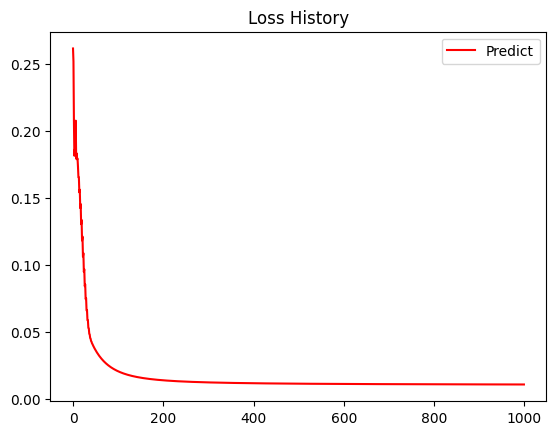

In [34]:
plt.plot(loss_history, color='red', label='Predict')
plt.title('Loss History')
plt.legend()
# plt.xlim(0, 120)
# plt.ylim(0, 120)
plt.show()

In [35]:
# Função de predição do MLP
def mlp_predict(X, w_in, w_out, bias_in, bias_out):
    # Forward
    Zin = (X @ w_in) + bias_in.T
    result_in = activate_functions('sigmoid', Zin)

    Zout = (result_in @ w_out) + bias_out.T
    result_out = activate_functions('softmax', Zout)

    # Converte as saídas para as classes preditas (0 a 9) usando a função argmax
    # A classe predita será o índice do valor máximo em cada linha
    print(result_out)
    classe = np.argmax(result_out, axis=1)
    print(classe.shape)

    return np.expand_dims(classe, axis=1)

# Realizar a predição no conjunto de teste
y_pred_test = mlp_predict(X_test, w_input, w_output, bias_input, bias_output)

print(y_pred_test.shape)
print(y_test.shape)

[[7.48386790e-04 9.99055624e-01 1.95989303e-04]
 [2.03289319e-08 8.05677472e-03 9.91943205e-01]
 [9.87010469e-05 9.92366034e-01 7.53526472e-03]
 [3.47184962e-08 2.91969516e-02 9.70803014e-01]
 [4.96408471e-08 1.07569155e-02 9.89243035e-01]
 [1.72347499e-03 9.98263168e-01 1.33573901e-05]
 [4.70617638e-08 1.64156385e-02 9.83584314e-01]
 [1.86789493e-06 2.20316574e-01 7.79681559e-01]
 [9.96415750e-01 3.58425021e-03 4.93583365e-17]
 [9.99763263e-01 2.36736988e-04 1.07912369e-20]
 [2.44150267e-12 4.33814110e-05 9.99956619e-01]
 [9.99675345e-01 3.24655147e-04 5.02356151e-20]
 [6.64330682e-05 9.90298742e-01 9.63482449e-03]
 [9.99659075e-01 3.40925121e-04 8.61230955e-20]
 [5.35280297e-03 9.94637208e-01 9.98875694e-06]
 [2.45119383e-04 9.97629343e-01 2.12553744e-03]
 [1.06705122e-03 9.98864985e-01 6.79635273e-05]
 [9.99432037e-01 5.67962657e-04 1.34099860e-19]
 [9.99913397e-01 8.66026586e-05 2.99359595e-21]
 [8.18184653e-03 9.91817442e-01 7.11436576e-07]
 [1.80746535e-05 8.89885344e-01 1.100965

In [36]:
# Avaliar o desempenho do classificador
error = (len(y_test) - sum(y_pred_test == y_test)) / len(y_test) 
print("Error: {}".format(error[0]))
print("Accuracy: {}".format(1 - error[0]))

Error: 0.0
Accuracy: 1.0
[CV 1/3] END .............hidden_layer_sizes=17;, score=1.000 total time=   0.1s
[CV 3/3] END .............hidden_layer_sizes=12;, score=0.925 total time=   0.1s
[CV 2/3] END ............hidden_layer_sizes=130;, score=0.925 total time=   0.2s
[CV 3/3] END ............hidden_layer_sizes=335;, score=0.925 total time=   0.2s
[CV 1/3] END .............hidden_layer_sizes=12;, score=1.000 total time=   0.1s
[CV 2/3] END ............hidden_layer_sizes=367;, score=0.925 total time=   0.2s
[CV 3/3] END ............hidden_layer_sizes=486;, score=0.925 total time=   0.2s
[CV 1/3] END ............hidden_layer_sizes=325;, score=1.000 total time=   0.2s
[CV 1/3] END ............hidden_layer_sizes=263;, score=1.000 total time=   0.2s
[CV 2/3] END .............hidden_layer_sizes=12;, score=0.975 total time=   0.1s
[CV 3/3] END ............hidden_layer_sizes=367;, score=0.975 total time=   0.2s
[CV 1/3] END ............hidden_layer_sizes=335;, score=1.000 total time=   0.2s
[CV